<a href="https://colab.research.google.com/github/jungmin0710/DataAnalysisBasic/blob/main/naverclover_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**얼굴 인식해서 닮은꼴 연예인 찾기 **

In [20]:
pip install pillow

파이썬에서 사진을 컨트롤하는 라이브러리

In [21]:
pip install requests

웹 전송/수신

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg    #jpg등의 이미지 파일 다루는 모듈

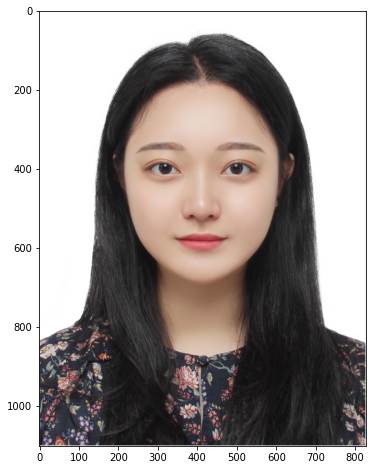

In [23]:
img = mpimg.imread('IMG_1814 엄정민 반.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [24]:
client_id = "PcadxlHpoofakp4E0Kz5"
client_secret = "P0qDLr6sEW"

In [25]:
import requests

url = "https://openapi.naver.com/v1/vision/face"    #celebrity는 유명인, face는 각종 얼굴인식 정보
files = {"image":open("IMG_1814 엄정민 반.jpg", "rb")}
headers = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}

response = requests.post(url, files=files,headers=headers)


In [26]:
import json

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys = False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 827,
            "height": 1102
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 230,
                "y": 294,
                "width": 368,
                "height": 368
            },
            "landmark": {
                "leftEye": {
                    "x": 319,
                    "y": 400
                },
                "rightEye": {
                    "x": 496,
                    "y": 400
                },
                "nose": {
                    "x": 407,
                    "y": 501
                },
                "leftMouth": {
                    "x": 336,
                    "y": 574
                },
                "rightMouth": {
                    "x": 475,
                    "y": 573
                }
            },
            "gender": {
                "value": "female",
                "confidence": 0.999719
            },
        

-여기서 쓰이는 간단한 문법 정리-

딕셔너리

In [27]:
dict_sample = {'Name':'pinkwink','Age':'None','Class':['beginner','blog']}

In [28]:
dict_sample

{'Age': 'None', 'Class': ['beginner', 'blog'], 'Name': 'pinkwink'}

In [29]:
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [30]:
dict_sample.values()

dict_values(['pinkwink', 'None', ['beginner', 'blog']])

In [31]:
dict_sample.get("Name")

'pinkwink'

In [32]:
dict_sample.get('Age')

'None'

In [33]:
dict_sample.get("ABC")

In [34]:
customer = {
    'id':'0001',
    'name':'홍길동',
    'history':[
               {'date':'2019-03-01', 'log':True},
               {'date':'2019-03-02', 'log':False},
               
    ]
}

In [35]:
import json
json_test = json.dumps(customer,indent = 4, ensure_ascii=False)    #json.dump를 사용하여 json데이터 생성
print(json_test)

{
    "id": "0001",
    "name": "홍길동",
    "history": [
        {
            "date": "2019-03-01",
            "log": true
        },
        {
            "date": "2019-03-02",
            "log": false
        }
    ]
}


결과 꾸미기

In [36]:
import requests
import json

url = "https://openapi.naver.com/v1/vision/face"
files = {"image":open("IMG_1814 엄정민 반.jpg", "rb")}
headers = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}

response = requests.post(url, files=files,headers=headers)


In [38]:
import requests
import json

url = "https://openapi.naver.com/v1/vision/face"
files = {"image":open("유재석.jpg", "rb")}
headers = {"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret}

response = requests.post(url, files=files,headers=headers)
detect_result = json.loads(response.text)
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys = False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 550,
            "height": 634
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 191,
                "y": 118,
                "width": 167,
                "height": 167
            },
            "landmark": {
                "leftEye": {
                    "x": 234,
                    "y": 158
                },
                "rightEye": {
                    "x": 308,
                    "y": 157
                },
                "nose": {
                    "x": 274,
                    "y": 204
                },
                "leftMouth": {
                    "x": 240,
                    "y": 236
                },
                "rightMouth": {
                    "x": 312,
                    "y": 233
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999987
            },
           

In [39]:
x, y, w, h = detect_result['faces'][0]["roi"].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [40]:
annotation = gender + " : " + str(gen_confidence) + "\n" + emotion + " : " + str(emotion_confidence) + "\n" + age + " : " + str(age_confidence)

In [41]:
print(annotation)

male : 0.999987
smile : 0.99832
45~49 : 0.299446


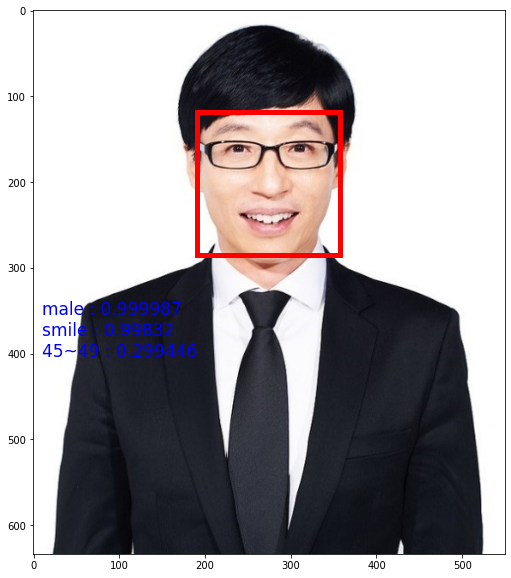

In [44]:
import matplotlib.patches as patches

img =mpimg.imread('유재석.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y),w,h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
ax.add_patch(rect_face)

plt.text(10,400,annotation,wrap=True,fontsize=17,color='blue')
plt.show()